# Import Libraries

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Number of Numeric and Categorical columns Count

In [2]:
df = pd.read_csv('World Weather dataset/GlobalWeatherRepository.csv') 

# Count numeric columns
numeric_columns_count = df.select_dtypes(include='number').shape[1]

# Count categorical columns
categorical_columns_count = df.select_dtypes(include='object').shape[1]

# Display the counts
print(f'Number of numeric columns: {numeric_columns_count}')
print(f'Number of categorical columns: {categorical_columns_count}')

# Check the shape of the dataset
print(f'Shape of the Dataset is: {df.shape}')

Number of numeric columns: 30
Number of categorical columns: 11
Shape of the Dataset is: (46577, 41)


# Data Cleaning & Preprocessing

## Missing Values

In [3]:
missing_values=df.isnull().sum()
print("Missing values:\n", missing_values)
missing_values = df.isnull().sum().sum()
# Check if there are any missing values and print the result using an f-string
if missing_values > 0:
    print(f"Missing values are present. Total missing values: {missing_values}")
else:
    print(f"No missing values are present in the Dataset.")

Missing values:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone              

## Check the Duplicates

In [4]:
# Count the number of duplicate rows
duplicates_count = df.duplicated().sum()

# Check if there are any duplicate rows and print the result using f-strings
if df.duplicated().any():
    print(f"Duplicates are present. Total duplicate rows: {duplicates_count}")
else:
    print(f"No duplicates are present in the Dataset.")

No duplicates are present in the Dataset.


## Standardize last_update format

In [5]:
# last_updated attribute is the Local date and time of the last data update in a specific location.
# Hence, converting this to datetime format.
df_new = df.copy()    ## Creating a copy of original dataframe for operations
df_new['last_updated'] = pd.to_datetime(df_new['last_updated'])

# last_updated attribute converted to datetime format as shown below.
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46577 entries, 0 to 46576
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       46577 non-null  object        
 1   location_name                 46577 non-null  object        
 2   latitude                      46577 non-null  float64       
 3   longitude                     46577 non-null  float64       
 4   timezone                      46577 non-null  object        
 5   last_updated_epoch            46577 non-null  int64         
 6   last_updated                  46577 non-null  datetime64[ns]
 7   temperature_celsius           46577 non-null  float64       
 8   temperature_fahrenheit        46577 non-null  float64       
 9   condition_text                46577 non-null  object        
 10  wind_mph                      46577 non-null  float64       
 11  wind_kph                    

## Standardize Country Names

In [6]:
df_new['country'].unique()

# Found few countries with ambiguous values in the dataset eg:- 'Ð¢Ñ\x83Ñ\x80Ñ\x86Ð¸Ñ\x8f'
# These country names can be deduced from the name of the city location they carry.

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Madagascar', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Comoros',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Swaziland', 'Ethiopia', 'Fiji Islands', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau

In [7]:
# Following ambiguous countries names to be replaced with their actual names:

# 'ç\x81«é¸¡' - Kingdom of Istanbul
# 'Ð¢Ñ\x83Ñ\x80Ñ\x86Ð¸Ñ\x8f' - Nauru
# 'Ð\x9fÐ¾Ð»Ñ\x8cÑ\x88Ð°' - Lebanon
# 'Ð\x93Ð²Ð°Ñ\x82ÐµÐ¼Ð°Ð»Ð°' - Republic of Gautemala
# 'Ù\x83Ù\x88Ù\x84Ù\x88Ù\x85Ø¨Ù\x8aØ§' - Costa Rica
# 'PolÃ´nia' - Polania
# 'BÃ©lgica' - Belgica
# 'TurkmÃ©nistan' - Turkmenistan
# 'MalÃ¡sia' - Malaysia
# 'SÃ¼dkorea' - South Korea
# 'Inde' - India

# Creating a list of fishy countries
Fishy_Countries = ['ç\x81«é¸¡', 'Ð¢Ñ\x83Ñ\x80Ñ\x86Ð¸Ñ\x8f', 'Ð\x9fÐ¾Ð»Ñ\x8cÑ\x88Ð°', 'Ð\x93Ð²Ð°Ñ\x82ÐµÐ¼Ð°Ð»Ð°',
    'Ù\x83Ù\x88Ù\x84Ù\x88Ù\x85Ø¨Ù\x8aØ§', 'PolÃ´nia', 'BÃ©lgica', 'TurkmÃ©nistan', 'MalÃ¡sia','SÃ¼dkorea','Inde']

# Found 11 rows with fishy country names
df_new[df_new['country'].isin(Fishy_Countries)]

# Assigning valid countries names to the erroneous country values.
df_new.iloc[11474,0] = 'Malaysia'  
df_new.iloc[11484,0] = 'Costa Rica'
df_new.iloc[11504,0] = 'Republic of Gautemala'
df_new.iloc[11512,0] = 'India'
df_new.iloc[11526,0] = 'Beirut'
df_new.iloc[11540,0] = 'Polania'
df_new.iloc[11547,0] = 'Nauru'
df_new.iloc[11577,0] = 'South Korea'
df_new.iloc[11581,0] = 'Belgica'
df_new.iloc[11588,0] = 'Turkmenistan'
df_new.iloc[11592,0] = 'Kingdom of Istanbul'
df_new.iloc[11538,0] = 'Mexico'

df_new['country'] = df_new['country'].apply(lambda x: 'Colombia' if x == 'كولومبيا' else x)
df_new['country'] = df_new['country'].apply(lambda x: 'Turkey' if x == '火鸡' else x)
df_new['country'] = df_new['country'].apply(lambda x: 'Poland' if x == 'Польша' else x)
df_new['country'] = df_new['country'].apply(lambda x: 'Turkey' if x == 'Турция' else x)
df_new['country'] = df_new['country'].apply(lambda x: 'Guatemala' if x == 'Гватемала' else x)

# Still there are same countries with multiple instances due to diffrent spellings,
# For eg:- Saudi Arabia and Saudi Arabien. They're treated below.
df_new['country'].replace(['Marrocos','Saudi Arabien','Saint-Vincent-et-les-Grenadines', 'Estonie', 'Jemen', 'Letonia'],
    ['Morocco', 'Saudi Arabia','Saint Vincent and the Grenadines', 'Estonia','Yemen','Latvia'], inplace=True)

df_new['country'].unique() # there are 198 unique countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Madagascar', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Comoros',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Swaziland', 'Ethiopia', 'Fiji Islands', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau

### Taking Insights about the country and location name column

In [8]:
# Check and print the minimum and maximum values of the country column
min_country, max_country = df_new['country'].min(), df_new['country'].max()
print(f"The 'country' which occurs the most in this dataset is: {min_country}")
print(f"The 'country' which occurs the least in this dataset is: {max_country}")

num_unique_location_name = df_new['location_name'].nunique()
print(f'There are {num_unique_location_name} unique values in the location_name column.')

# Lets check the minimum and maximum values of the id column and explore this it
min_location_name, max_location_name = df_new['location_name'].min(), df_new['location_name'].max()
print(f"The 'Location_name' which occurs the most in this dataset is: {min_location_name}")
print(f"The 'Location_name' which occurs the least in this dataset is: {max_location_name}")

# Count unique combinations of country and location_name
country_location_count = df_new.groupby(['country', 'location_name']).size().reset_index(name='count')

# Lets Get the number of unique countries along with their location names
unique_countries = country_location_count['country'].nunique()
print(f"Total number of unique countries along with their location names present in the dataset are: {unique_countries}")

The 'country' which occurs the most in this dataset is: Afghanistan
The 'country' which occurs the least in this dataset is: Zimbabwe
There are 248 unique values in the location_name column.
The 'Location_name' which occurs the most in this dataset is: 'S Gravenjansdijk
The 'Location_name' which occurs the least in this dataset is: Zagreb
Total number of unique countries along with their location names present in the dataset are: 198


### Observations:
- There are 198 unique values present in the country column of this dataset.
- The 'country' which occurs minimum in this dataset is: Afghanistan.
- And The 'country' which occurs maximum in this dataset is: Zimbabwe.
- There are 248 unique values in the location_name column of this Dataset.
- Hence, in this Dataset there are Total 198 unique countries along with their location names present.
- There are Total 198 unique countries along with their location names present in the dataset
- Comprehensive Coverage: The dataset includes 206 unique countries and 248 unique location names, providing extensive global weather data.
- Data Distribution Insight: The least represented country is Afghanistan, whereas Zimbabwe has the most entries, pointing out the need for balanced data collection.

## Display the Boxplot to Detect Outliers

### About the Code of Boxplot:
- This code is usually used to detect and visualize outliers present in the numeric columns of a Dataset using boxplot subplots and the Interquartile Range (IQR) method.
- This code selects the numeric columns first to visualize the outliers present in the numeric column
- IQR Method is used to identify outliers and It is calculated as the difference between the 3rd quartile (Q3) and the 1st quartile (Q1) using the formula IQR = Q3 - Q1.
- The Data points below this threshold (Q1 - 1.5 * IQR) are considered outliers and it is termed as low bound.
- The Data points above this threshold (Q3 + 1.5 * IQR) are also considered as outliers and it is termed as upper bound.
- The Number of rows and columns are set to create the poxplot subplopts
- By using the command plt.axhline(y=lower_bound) add the red line at lower bound to detect the outliers
- By using the command plt.axhline(y=upper_bound) add the red line at upper bound to detect the outliers
- To create the insightful plot legend, title, xaxis and yaxis labels are then added and displays the plot

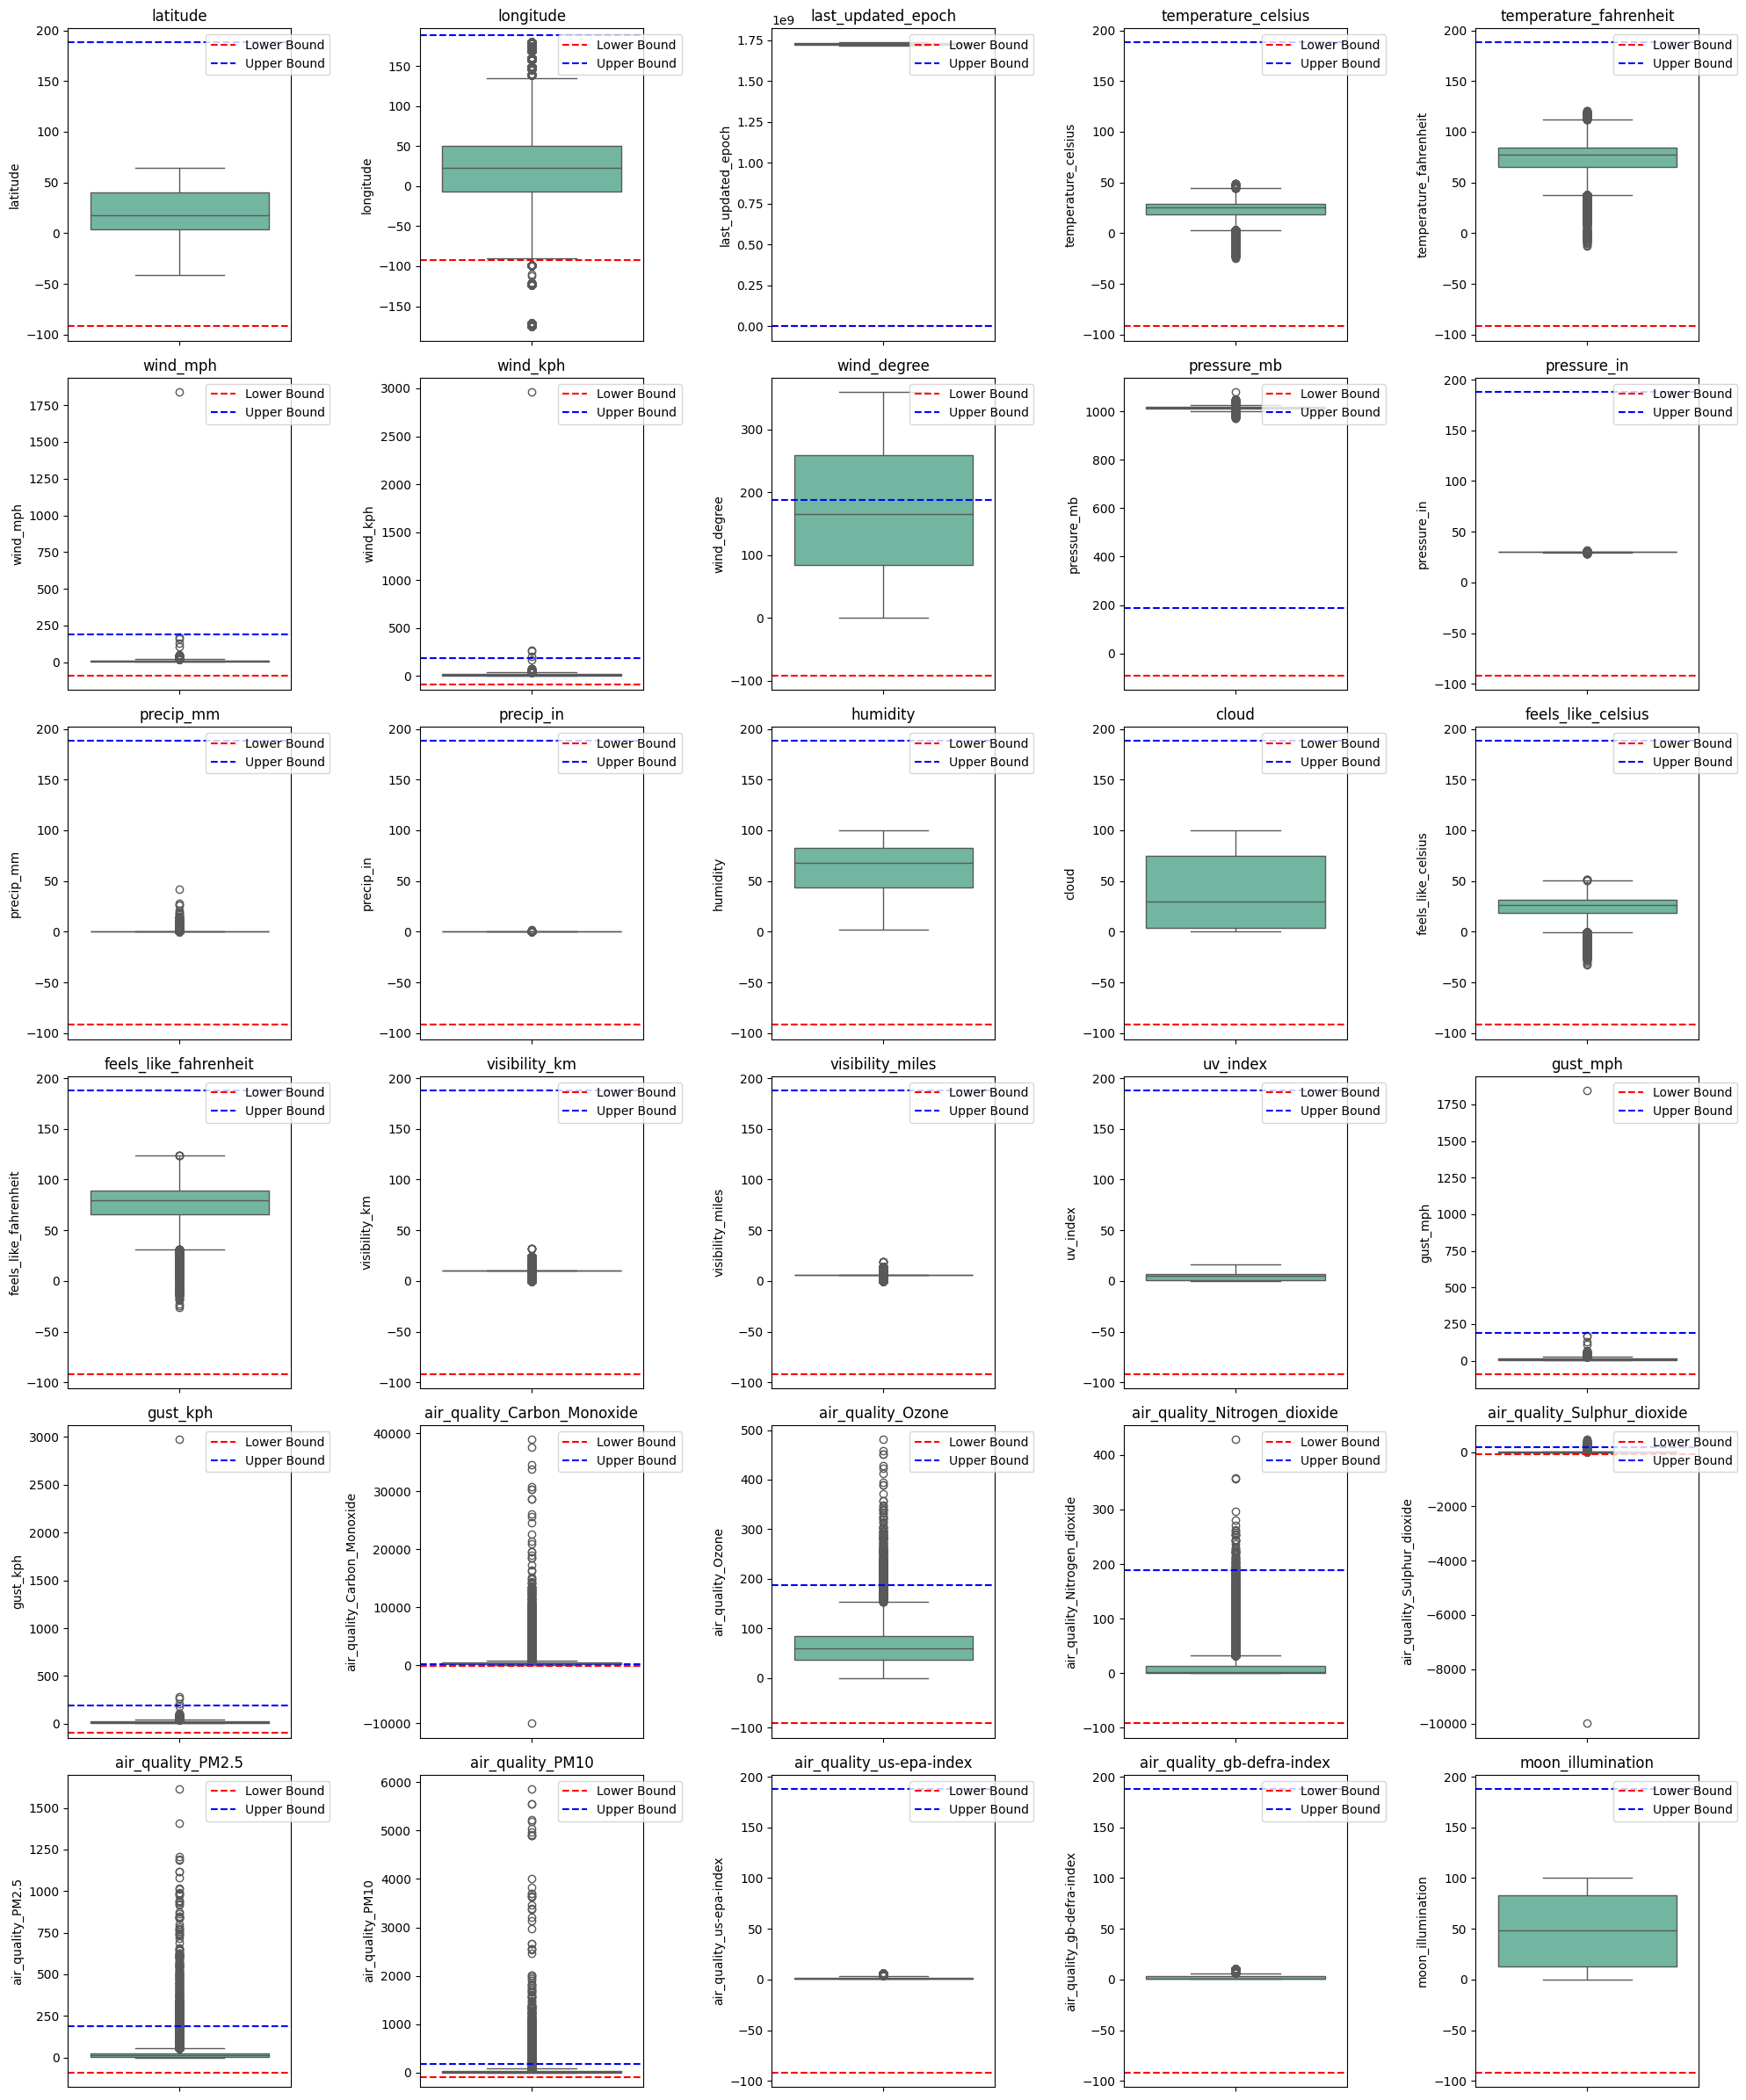

In [9]:
# Select numeric columns
numeric_columns = df_new.select_dtypes(include=['number']).columns

# Calculate IQR and identify outliers
outliers = {}

for column in numeric_columns:
    Q1 = df_new[column].quantile(0.25)
    Q3 = df_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers[column] = df_new[(df_new[column] < lower_bound) | (df_new[column] > upper_bound)]

# Set up the matplotlib figure (30 numeric features)
num_cols = 5
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 4))

# Create boxplots
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df_new[column], palette='Set2')
    
    # Add lines for lower and upper bounds to detect the outliers
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='blue', linestyle='--', label='Upper Bound')
    
    plt.title(column)
    plt.xlabel('')
    
    # Add the legend outside the boxplot area
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

In [10]:
# Select numeric columns
numeric_columns = df_new.select_dtypes(include=['number']).columns

# Create a boolean mask for outliers
outlier_mask = pd.Series(False, index=df_new.index)

# Calculate IQR and identify outliers
for column in numeric_columns:
    Q1 = df_new[column].quantile(0.25)
    Q3 = df_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Update the outlier mask
    outlier_mask |= (df_new[column] < lower_bound) | (df_new[column] > upper_bound)

# Add a column to indicate outliers (True if any column has an outlier, else False)
df_new['Outlier_Flag'] = outlier_mask
df_new['Outlier_Flag']

0        False
1         True
2         True
3         True
4         True
         ...  
46572     True
46573     True
46574    False
46575    False
46576     True
Name: Outlier_Flag, Length: 46577, dtype: bool

### About the Code of Boxplot after removing outliers:
- This code is used to perform the outlier detection and the removal from the Dataset
- It visualizes the cleaned data using boxplots subplots for each numeric column present in the Dataset.
- The command df.select_dtypes(include=['number']) selects the numeric columns from the Dataset and it stores these column names for later use.
- After that the code Initializes a boolean mask outlier_mask of the same length as the DataFrame .
- All values are initially taken as False, which means no rows are considered outliers at this point
- After that this mask will be updated as outliers are detected.
- Hence, For each numeric column in the Dataframe, the code calculates the Interquartile Range (IQR)
and calculates the lower and upper boundary and removing the outliers.
- With the name of df_no_outliers the new dataframe is created which is cleaned with outliers
- Set the labels and title and displays the plot Finally

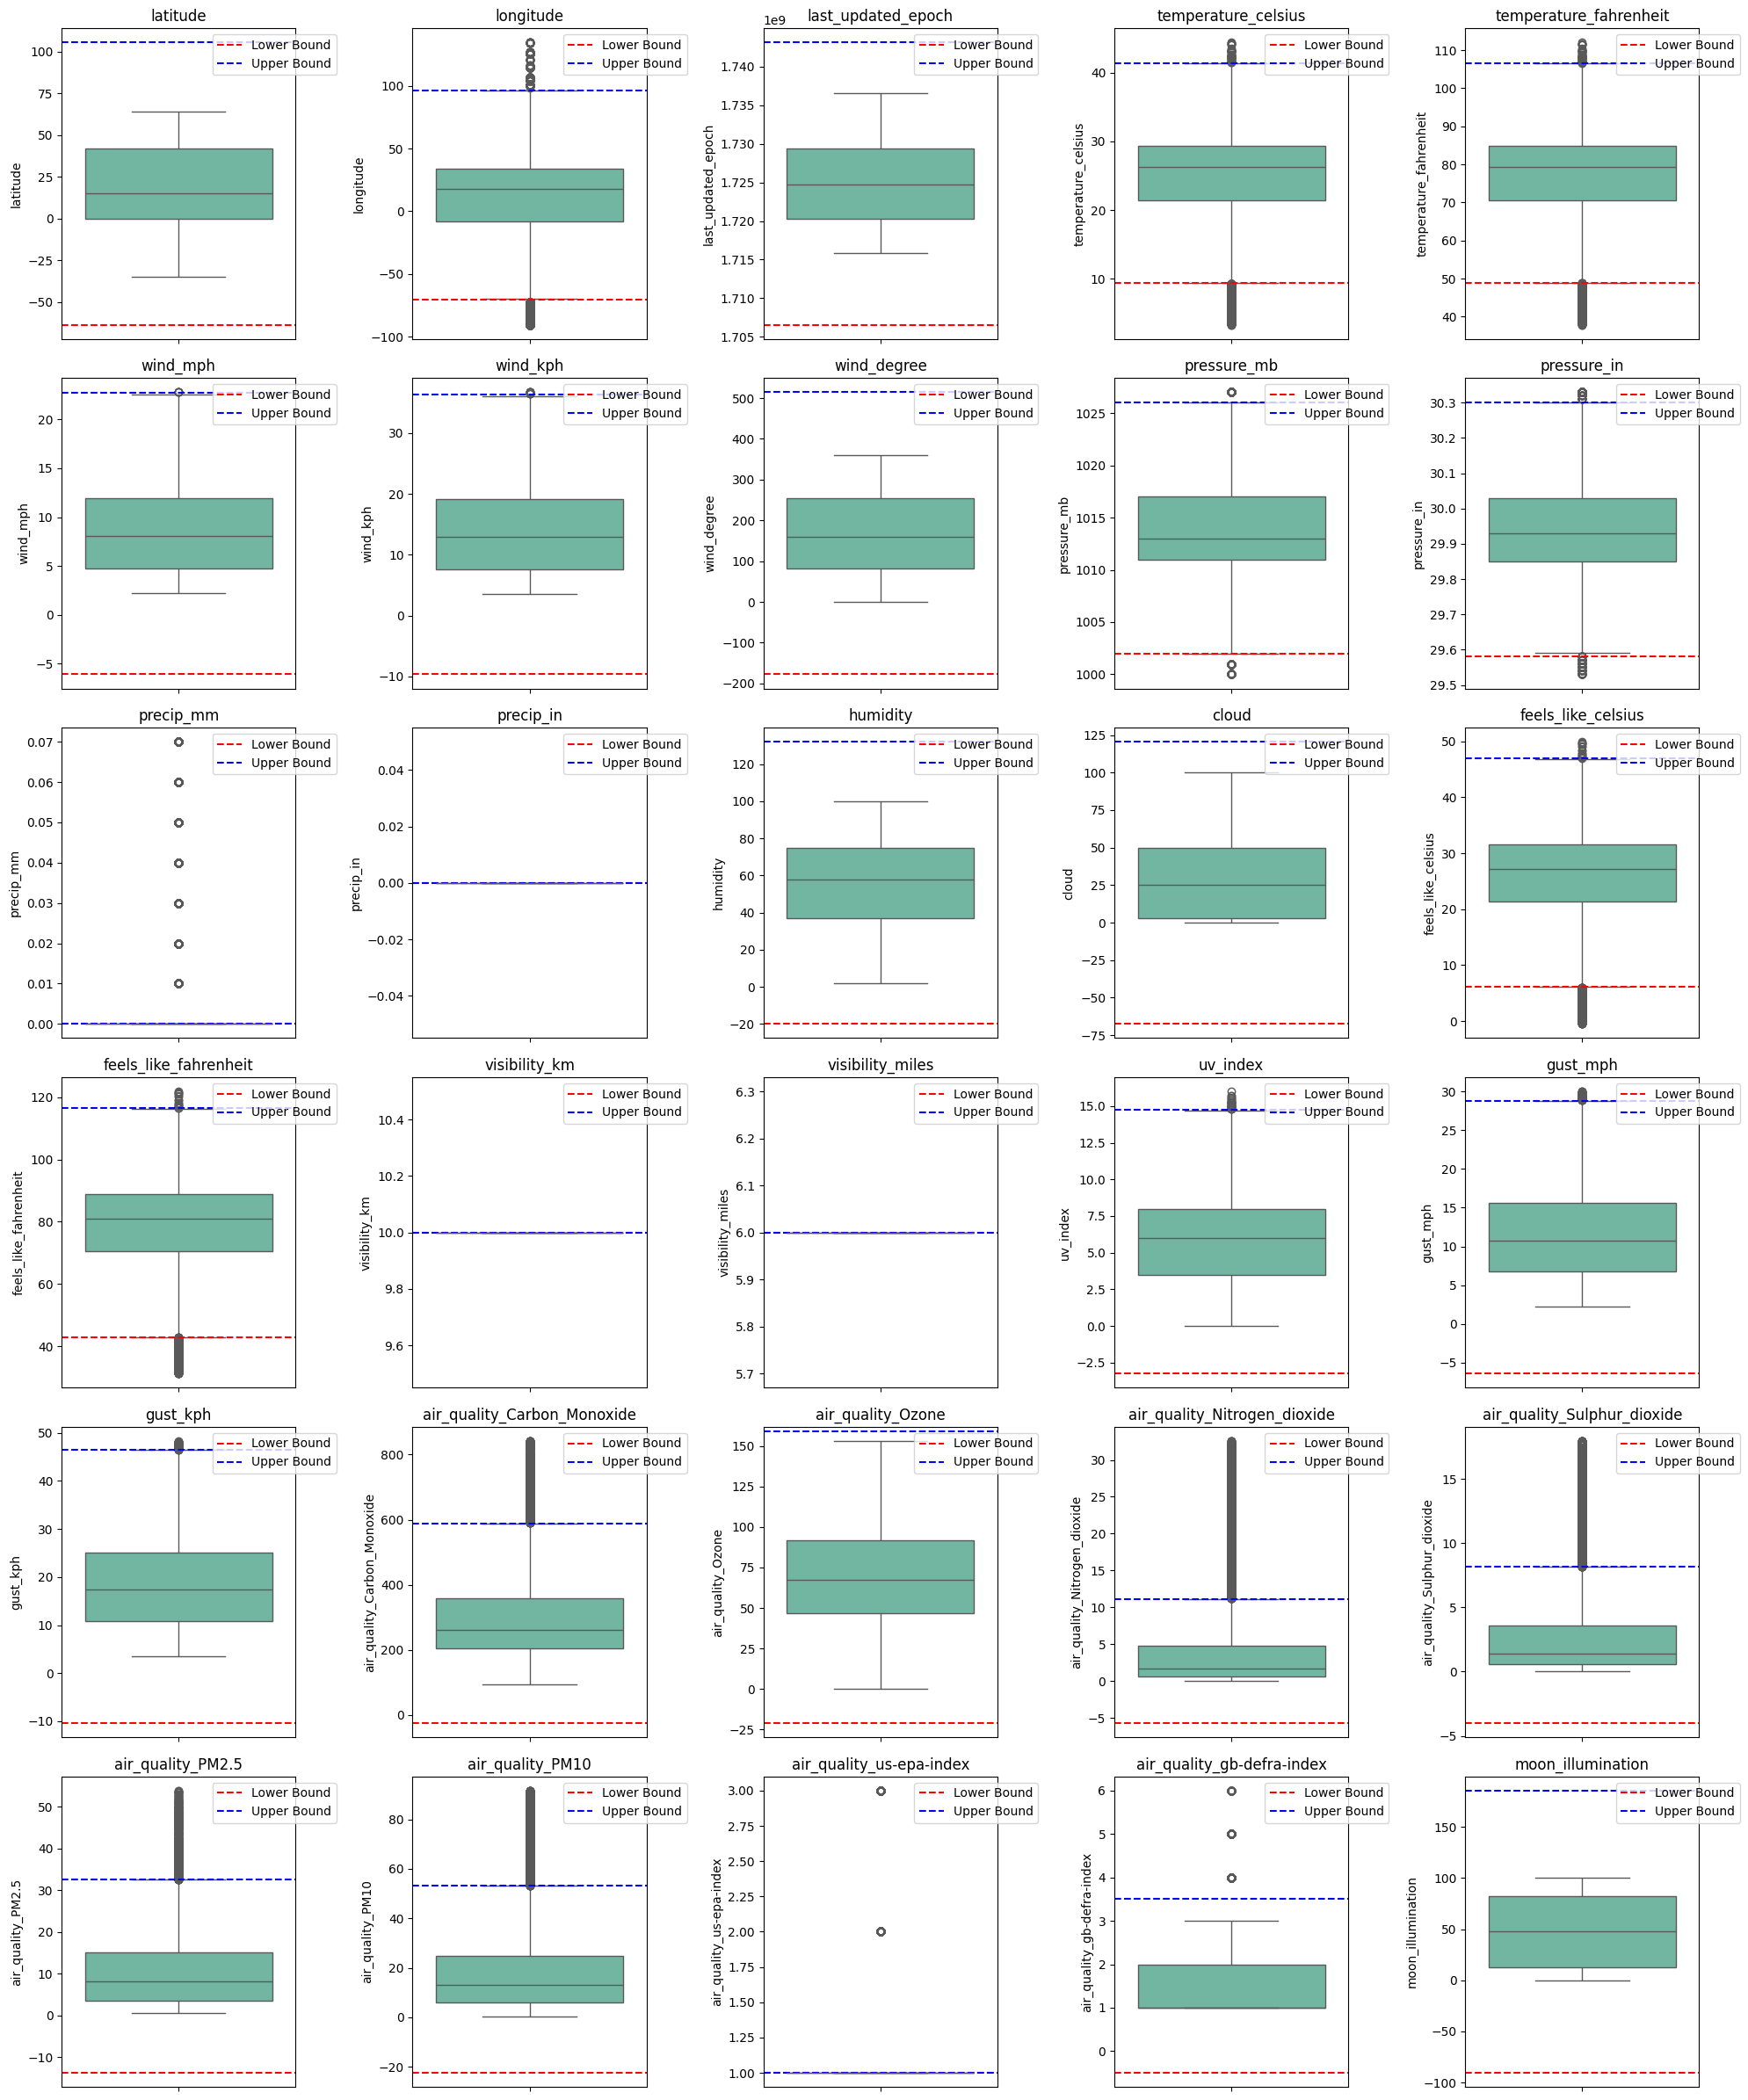

In [11]:
# Select numeric columns
numeric_columns = df_new.select_dtypes(include=['number']).columns

# Create a boolean mask for outliers
outlier_mask = pd.Series(False, index=df_new.index)

# Calculate IQR and identify outliers
for column in numeric_columns:
    Q1 = df_new[column].quantile(0.25)
    Q3 = df_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Update the outlier mask
    outlier_mask |= (df_new[column] < lower_bound) | (df_new[column] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df_new[~outlier_mask]

# Set up the matplotlib figure
num_cols = 5
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 4))

# Create boxplots for the DataFrame without outliers
for i, column in enumerate(numeric_columns):
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df_no_outliers[column], palette='Set2')
    
    # Add lines for lower and upper bounds specific to each column
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='blue', linestyle='--', label='Upper Bound')
    
    plt.title(column)
    plt.xlabel('')
    
    # Add the legend outside the boxplot area
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA)

## Trends

In [12]:
# Extracting date and time attributes from last_updated attribute
df_no_outliers['Date'] = df_no_outliers['last_updated'].dt.date
df_no_outliers['Time'] = df_no_outliers['last_updated'].dt.time

# Converting the Date attribute to datetime format
df_no_outliers['Date'] = pd.to_datetime(df_no_outliers['Date']) 

# Dropping the last_updated_epoch column as it doesn't provide any insight to the data analysis.
df_no_outliers.drop('last_updated_epoch', axis=1, inplace=True)

# Dropping one instance from metrices of same weather parameter but with different units.
df_no_outliers.drop(['temperature_fahrenheit','wind_kph','pressure_in','precip_in','feels_like_fahrenheit',
             'visibility_miles','gust_kph'],axis=1, inplace=True)

# Selecting all the metrices columns in dataframe
df_no_outliers.select_dtypes(include=['int','float'])

latitude  longitude  temperature_celsius  wind_mph  wind_degree  \
0       34.5200    69.1800                 26.6       8.3          338   
5       17.1200   -61.8500                 26.0       5.6           90   
6      -34.5900   -58.6700                  8.0       2.2           10   
9       48.2000    16.3700                 16.0      12.5          110   
10      40.4000    49.8800                 17.0       4.3           20   
...         ...        ...                  ...       ...          ...   
46559   10.6500   -61.5167                 24.3       6.7          109   
46560   36.8028    10.1797                 16.3      11.2          252   
46569  -34.8581   -56.1708                 20.4       6.9           81   
46574   15.3547    44.2067                 20.8       4.0          259   
46575  -15.4167    28.2833                 26.1       8.1           20   

       pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  ...  \
0           1012.0       0.00        24     30                25.3  ...   
5           1013.0       0.02        84     25                28.2  ...   
6           1014.0       0.00        93      0                 7.1  ...   
9           1013.0       0.00        63     75                16.0  ...   
10          1020.0       0.00        68     50                17.0  ...   
...            ...        ...       ...    ...                 ...  ...   
46559       1012.0       0.00        89     50                26.6  ...   
46560       1020.0       0.00        63      0                16.3  ...   
46569       1016.0       0.00        83      0                20.4  ...   
46574       1014.0       0.00        17      0                20.8  ...   
46575       1013.0       0.00        56     16                27.1  ...   

       gust_mph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0           9.5                       277.00              103.0   
5          15.7                       220.30               29.0   
6           6.5                       270.40                7.7   
9          19.8                       220.30               68.7   
10          4.6                       227.00               81.5   
...         ...                          ...                ...   
46559      12.6                       257.15               69.0   
46560      13.7                       333.00               50.0   
46569      10.0                       414.40               40.0   
46574       4.6                       382.95               86.0   
46575       9.5                       640.10               64.0   

       air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                             1.100                        0.200   
5                             0.200                        0.200   
6                             8.300                        1.300   
9                             5.100                        4.100   
10                            7.100                        1.800   
...                             ...                          ...   
46559                         2.405                        1.480   
46560                         8.695                       15.170   
46569                         3.145                        5.180   
46574                         0.370                        2.775   
46575                         0.925                        2.590   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0                  8.400            26.600                         1   
5                  1.200             4.500                         1   
6                  4.000             5.300                         1   
9                  3.700             4.400                         1   
10                 1.900             2.200                         1   
...                  ...               ...                       ...   
46559             11.285            16.095                         1   
46560             1

### About the Code of Countplot:
- This plot is used for the visual representation of the top 10 countries in the dataset based on the number of weather records.
- This code highlights the frequency of occurrences and make easier to compare countries directly by count of records which is shown at the top of each bar.
- By creating this plot we can easily took insights about the value counts of the country column
.nlargest(10) is used to extracts the top 10 most frequent countries on which the plot is being created.
- The command filtered_df = df[df['country'].isin(top_countries)] is used to filter the dataframe to include only those records where the country is in the top 10.
sns.countplot(data=filtered_df, x='country', order=top_countries) is used to create a bar plot that counts the occurrences of each country present in the Dataset.
- The order=top_countries is used to ensure that the bars are displayed in the same order as the top 10 countries.
- Then the loop is created which causes looping through each bar of the plot
- Then add the label and the count of each Country on the Top of each Bar
- These value counts is used to provide the deep insights about the value counts of country column of this Dataset
- Then set the title, x-axis and y-axis label and adjust the layout
- Finally Displays the plot

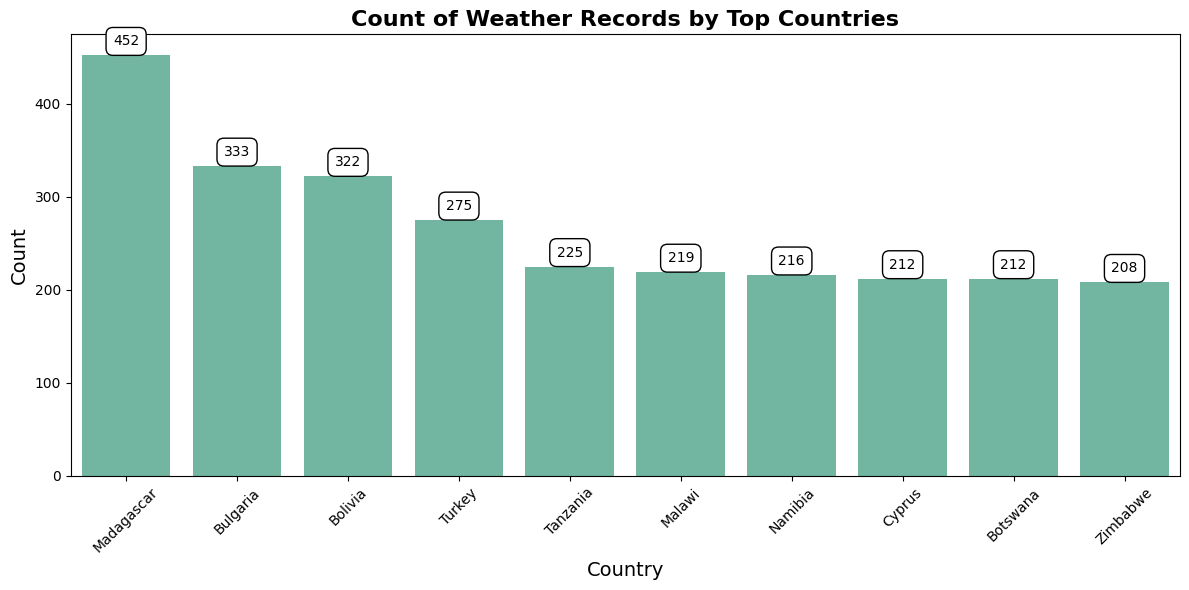

In [13]:
# Set a specific color palette
sns.set_palette("Set2")  # Set color palette

# Count the occurrences of each country
top_countries = df_no_outliers['country'].value_counts().nlargest(10).index  # Get top 10 countries
filtered_df = df_no_outliers[df_no_outliers['country'].isin(top_countries)]  # Filter dataset

# Create a count plot for the 'country' column
plt.figure(figsize=(12, 6))
country_counts = sns.countplot(data=filtered_df, x='country', order=top_countries)

# Add counts on top of each bar as a container
for p in country_counts.patches:
    count_value = int(p.get_height())
    country_counts.annotate(f'{count_value}', 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='bottom', fontsize=10, color='black', 
                            xytext=(0, 5), textcoords='offset points',
                            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')) 

# Set titles and labels
plt.title('Count of Weather Records by Top Countries', fontsize=16, fontweight='bold')  
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### About the Code of Pie chart Subplots:
- The code is used to create the pie charts of four categorical columns such as moon_phase, condition_text, wind_direction, and country from the dataset.
- For each column, only the top 6 categories with their percentages are shown which helps us to focus on the most important data and avoid cluttering (which causes difficulty in taking insights about the Dataset).
- Pie charts provide us the way to understand easily that how thecategories are distributed.
- The set the "Set2" palette which ensures that the charts are visually appealing and the different categories are easy to distinguish.
- By applying this code we can generate pie charts of four categorical columns in a dataset.
- The categorical columns list is then created which then used to visualize the plot
- After that Subplot figures are created
axes = axes.flatten() is used to onverts the 2x2 array of subplots into a 1D list, Hence it makes easier to iterate over the subplots in the loop
- Setting the Set2 color pelette is used to display the visually appealing plot
Then plot the pie chart, set the x-axis and y-axis labels and Finally Displays the plot

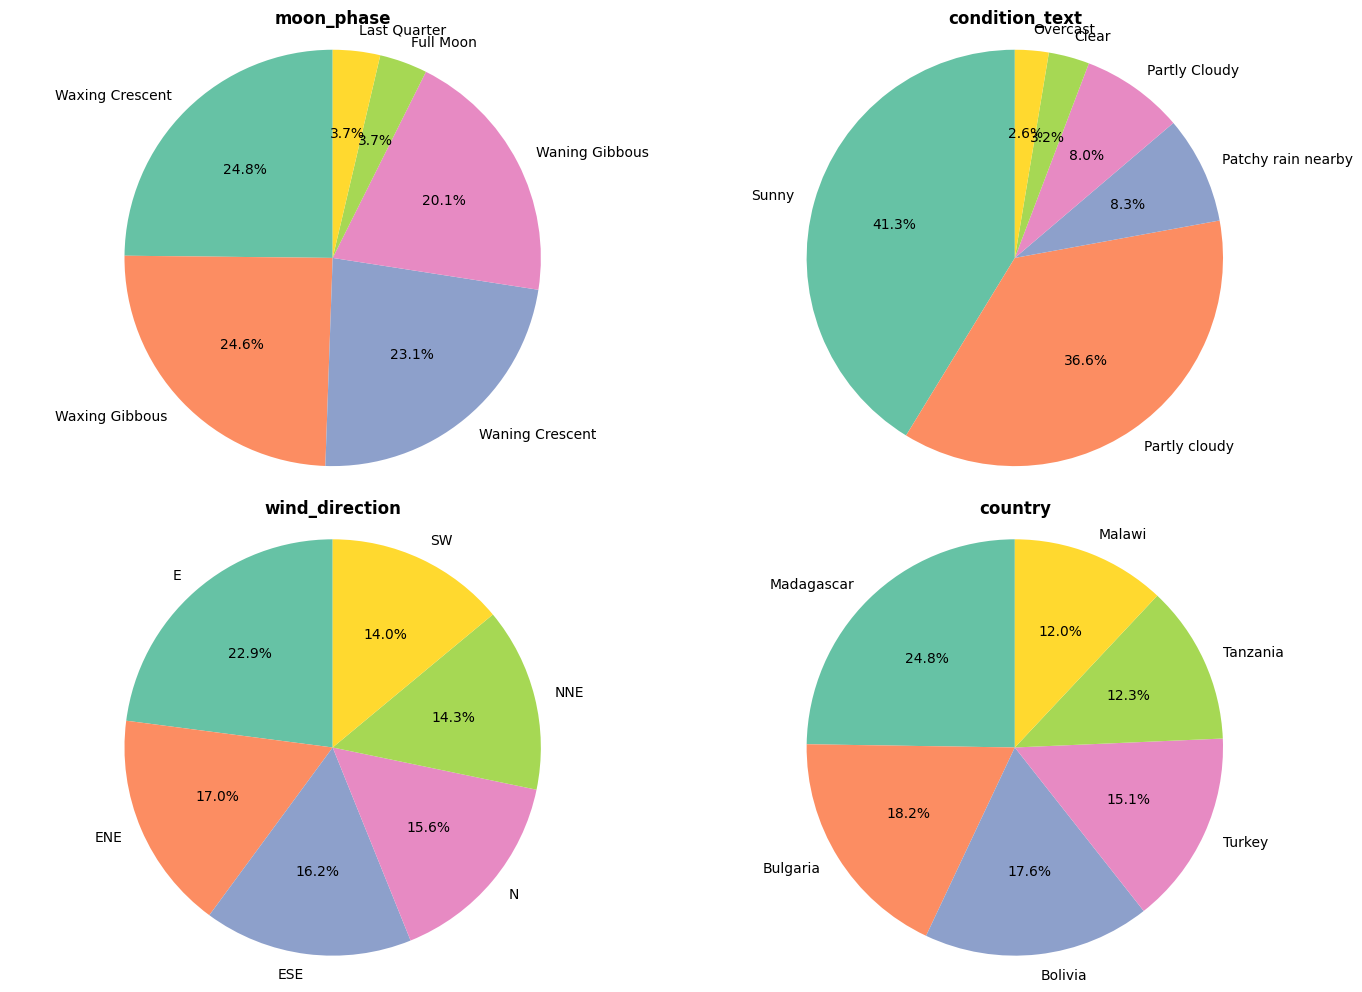

In [14]:
# Set color palette
sns.set_palette("Set2")  

# List of categorical columns to plot
categorical_columns = ['moon_phase', 'condition_text', 'wind_direction', 'country']

# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust rows, cols depending on the number of plots
axes = axes.flatten()  # Flattening for easy iteration

# Lets Get Set2 colors for the pie charts
pastel_colors = sns.color_palette("Set2", n_colors=6)

# Loop through each categorical column
for i, col in enumerate(categorical_columns):
    # Get the top 6 values
    top_6_values = df_no_outliers[col].value_counts().nlargest(6)
    
    # Plot pie chart for each
    top_6_values.plot(kind='pie', autopct='%1.1f%%', ax=axes[i], startangle=90, colors=pastel_colors)
    
    # Set title and label
    axes[i].set_title(f"{col}", fontweight='bold')
    axes[i].set_ylabel('') 
    axes[i].axis('equal')  

# Adjust layout
plt.tight_layout()
plt.show()

## Correlations and Patterns

### Analysing Correlation between Latitude & Temperature

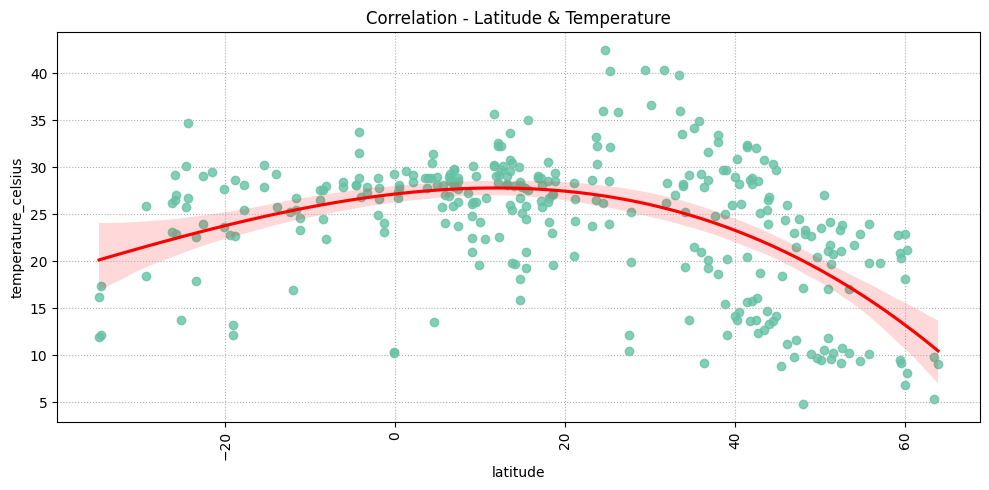

In [15]:
df_latitude_mean_temp = df_no_outliers.groupby(['latitude'],as_index=False).agg({'temperature_celsius':'mean'}).sort_values(by='temperature_celsius', ascending=False)

fig, my_ax = plt.subplots(figsize=(10,5))

sns.regplot(data = df_latitude_mean_temp, y='temperature_celsius', x='latitude', order=3,
            scatter=True, fit_reg=True, line_kws={"color": "red"}, ax=my_ax)
plt.xticks(rotation=90)

plt.grid(linestyle=':')
plt.title('Correlation - Latitude & Temperature')

plt.tight_layout()
plt.show() 

### Analysing Correlation between Latitude & Temperature

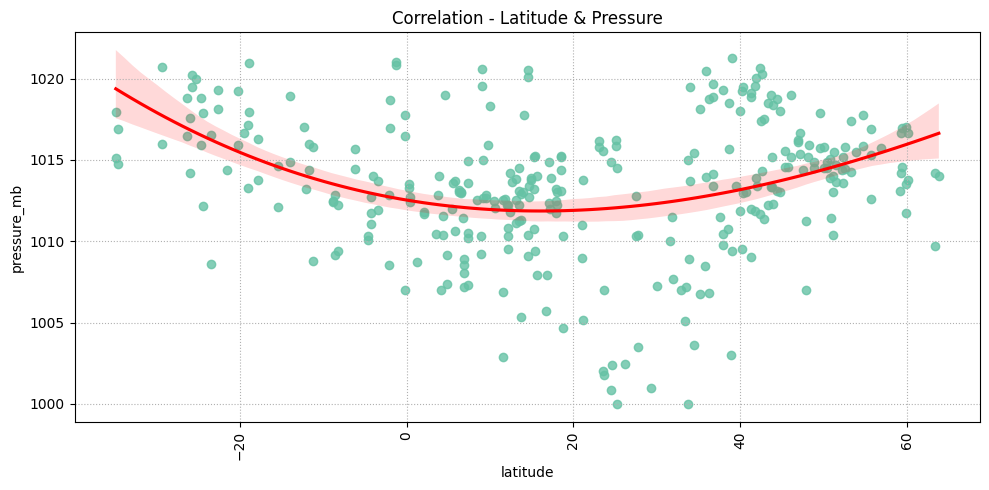

In [16]:
df_latitude_mean_pressure = df_no_outliers.groupby(['latitude'],as_index=False).agg({'pressure_mb':'mean'}).sort_values(by='pressure_mb', ascending=False)

fig, my_ax = plt.subplots(figsize=(10,5))

sns.regplot(data = df_latitude_mean_pressure, y='pressure_mb', x='latitude', 
            order=3, scatter=True, fit_reg=True, line_kws={"color": "red"}, ax=my_ax)
plt.xticks(rotation=90)

plt.grid(linestyle=':')
plt.title('Correlation - Latitude & Pressure')

plt.tight_layout()
plt.show()

### Analysing Correlation between Latitude & Humidity

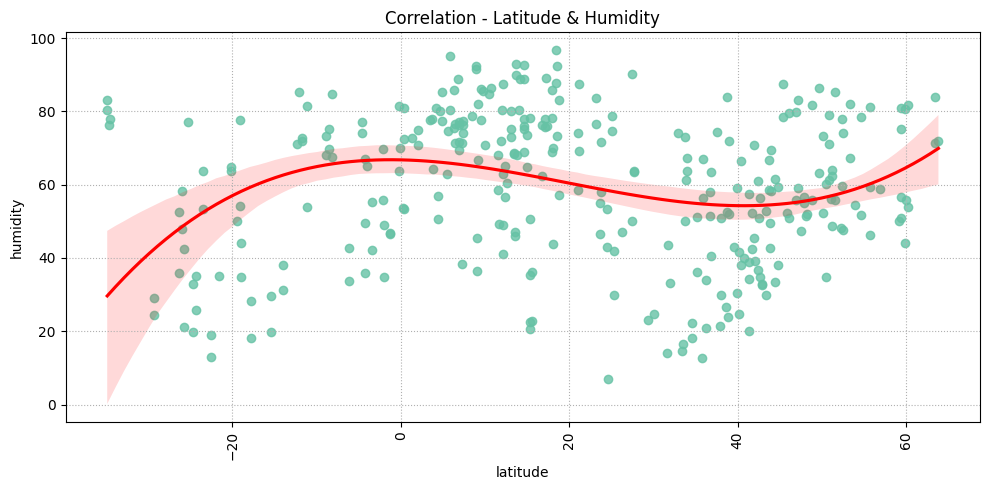

In [17]:
df_latitude_mean_humidity = df_no_outliers.groupby(['latitude'],as_index=False).agg({'humidity':'mean'}).sort_values(by='humidity', ascending=False)

fig, my_ax = plt.subplots(figsize=(10,5))

sns.regplot(data = df_latitude_mean_humidity, y='humidity', x='latitude', 
            order=3, scatter=True, fit_reg=True, line_kws={"color": "red"}, ax=my_ax)
plt.xticks(rotation=90)

plt.grid(linestyle=':')
plt.title('Correlation - Latitude & Humidity')

plt.tight_layout()
plt.show()   

### Analysing Correlation between Longitude & Temperature

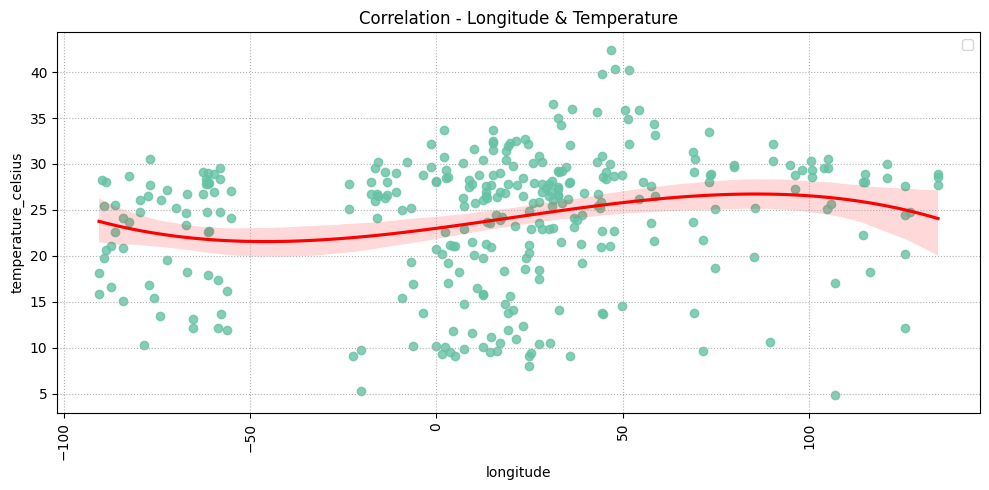

In [18]:
df_longitude_mean_temp = df_no_outliers.groupby(['longitude'],as_index=False).agg({'temperature_celsius':'mean'}).sort_values(by='temperature_celsius', ascending=False)

fig, my_ax = plt.subplots(figsize=(10,5))

sns.regplot(data = df_longitude_mean_temp, y='temperature_celsius', x='longitude', 
            order=3, scatter=True, fit_reg=True, line_kws={"color": "red"}, ax=my_ax)
plt.xticks(rotation=90)

plt.grid(linestyle=':')
plt.title('Correlation - Longitude & Temperature')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Analysing Correlation between Longitude & Pressure 

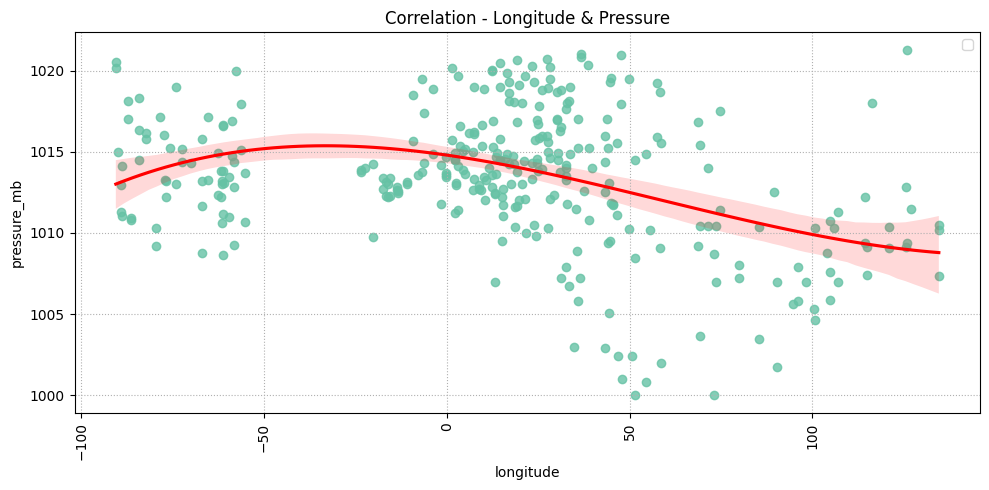

In [19]:
df_longitude_mean_pressure = df_no_outliers.groupby(['longitude'],as_index=False).agg({'pressure_mb':'mean'}).sort_values(by='pressure_mb', ascending=False)

fig, my_ax = plt.subplots(figsize=(10,5))

sns.regplot(data = df_longitude_mean_pressure, y='pressure_mb', x='longitude', 
            order=3, scatter=True, fit_reg=True, line_kws={"color": "red"}, ax=my_ax)
plt.xticks(rotation=90)

plt.grid(linestyle=':')
plt.title('Correlation - Longitude & Pressure')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()   

### Analysing Correlation between Temperature & UV Index

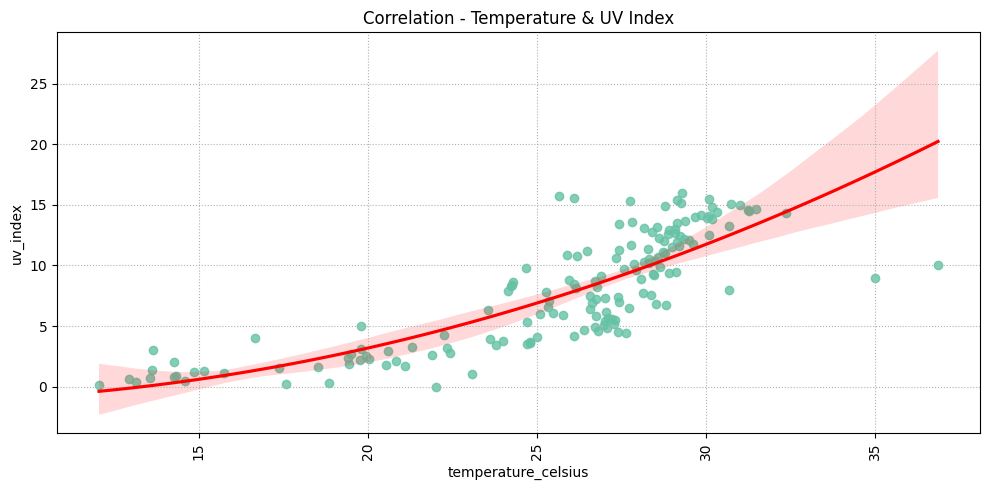

In [20]:
df_temp_mean_uv_index = df_no_outliers.groupby(['uv_index'],as_index=False).agg({'temperature_celsius':'mean'}).sort_values(by='temperature_celsius', ascending=False)

fig, my_ax = plt.subplots(figsize=(10,5))

sns.regplot(data = df_temp_mean_uv_index, x='temperature_celsius', y='uv_index', 
            order=2, scatter=True, fit_reg=True, line_kws={"color": "red"}, ax=my_ax)
plt.xticks(rotation=90)

plt.grid(linestyle=':')
plt.title('Correlation - Temperature & UV Index')

plt.tight_layout()
plt.show()   

## Temperature and Precipitation Visualization

### About the Code of Choropleth Map:
- This code is used to grouped the sampling technique to ensure that each country of this Dataset represented equally on the map.
- By creating the choropleth map we can easily understand that how the locations are distributed geographically.
- The colors represents the temperature and precipitation data across different countries.
- This is especially useful when we want to analyze the regional patterns in temperature or want to visualize the spread of locations on a global level.
- The hover feature provides specific details about the location names in Choropleth Map.
- Firstly this code took 20 random samples of locations from each country of the dataset and then creates a choropleth map inorder to visualize the geographical distribution of these locations
- After applying the sampling reset_index(drop=True) is used to reset the index of the resulting Dataframe
- The choropleth map basically uses the colors to represent different regions on a map
- Various parameter like hover_name, location_mode, color, title name is usedto create the plot which provide deep insights about the Dataset.
- Finally by this code updates the layout and displays the plot

In [21]:
# Sample 20 random locations from each country
sampled_df = df_no_outliers.groupby('country').apply(lambda x: x.sample(min(len(x), 20))).reset_index(drop=True)

# Create a geo map to visualize the locations
fig = px.choropleth(
    sampled_df,
    locations='country',  
    locationmode='country names',  
    color='temperature_celsius', 
    hover_name='location_name',  # Hover information
    title='<b>Geographical Distribution of Locations by Country</b>', 
    template='plotly_white'
)

# Update layout to remove the legend
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

In [22]:
# Sample 20 random locations from each country
sampled_df = df_no_outliers.groupby('country').apply(lambda x: x.sample(min(len(x), 20))).reset_index(drop=True)

# Create a geo map to visualize the locations
fig = px.choropleth(
    sampled_df,
    locations='country',  
    locationmode='country names',  
    color='precip_mm', 
    hover_name='location_name',  # Hover information
    title='<b>Geographical Distribution of Locations by Country</b>', 
    template='plotly_white'
)

# Update layout to remove the legend
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

# Model Building

## Import new libraries for Machine Learning Regression model

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
# prints all the column names
print(df_no_outliers.select_dtypes(include=['int','float']).columns)
print(df_no_outliers.select_dtypes(include=['object']).columns)

Index(['latitude', 'longitude', 'temperature_celsius', 'wind_mph',
       'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud',
       'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_mph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')
Index(['country', 'location_name', 'timezone', 'condition_text',
       'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset',
       'moon_phase', 'Time'],
      dtype='object')


In [25]:
# predict temperature using relevant features
features = ['latitude', 'longitude', 'temperature_celsius', 'pressure_mb', 'precip_mm', 'humidity', 'cloud',
       'feels_like_celsius', 'uv_index']
target = 'temperature_celsius'

X = df_no_outliers[features]
y = df_no_outliers[target]

# Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

# Standardize input
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"number of training data：{len(X_train):,}")
print(f"number of testing data：{len(X_test):,} ")

number of training data：15,833
number of testing data：3,959 


## Gradient Boosting Regressor

In [26]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)
gbr_predictions = gbr.predict(X_test_scaled)

# Evaluate Gradient Boosting Model
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_r2 = r2_score(y_test, gbr_predictions)
print(f"Gradient Boosting Performance:\nMAE: {gbr_mae}, MSE: {gbr_mse}, R2_score: {gbr_r2}")

Gradient Boosting Performance:
MAE: 0.03812538068339576, MSE: 0.0030262299105796604, R2_score: 0.9999373836089157


## Random Forest Regressor

In [27]:
# Random Forest Regressor
rfr = RandomForestRegressor(random_state=42, n_estimators=100)
rfr.fit(X_train_scaled, y_train)
rfr_predictions = rfr.predict(X_test_scaled)

# Evaluate Random Forest Regressor Model
rfr_mae = mean_absolute_error(y_test, rfr_predictions)
rfr_mse = mean_squared_error(y_test, rfr_predictions)
rfr_r2 = r2_score(y_test, rfr_predictions)
print(f"Random Forest Performance:\nMAE: {rfr_mae}, MSE: {rfr_mse}, R2_score: {rfr_r2}")

Random Forest Performance:
MAE: 0.0005238696640863817, MSE: 2.43884819398872e-05, R2_score: 0.9999994953725367


## Linear Regressor

In [28]:
# Linear Regressor
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_predictions = lr.predict(X_test_scaled)

# Evaluate Linear Regressor Model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regressor Performance:\nMAE: {lr_mae}, MSE: {lr_mse}, R2_score: {lr_r2}")

Linear Regressor Performance:
MAE: 5.749491422095178e-15, MSE: 5.404265084972034e-29, R2_score: 1.0


## Observation
- Linear Regression: Likely overfitting or benefiting from a simplistic dataset structure.
- Random Forest: Best overall balance of accuracy and robustness for this dataset. Likely the most reliable choice in practice.
- Gradient Boosting: Performs very well but slightly less precise compared to Random Forest. It’s still a solid option if you want a simpler model with strong interpretability.